In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets.mnist import load_data

Using TensorFlow backend.


In [3]:
(train_digits,train_labels),(test_digits,test_labels)=load_data()
print(train_digits.shape)
print(test_digits.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [4]:
import pandas as pd
pd.Series(train_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Length: 60000, dtype: uint8>

In [5]:
pd.Series(test_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Length: 10000, dtype: uint8>

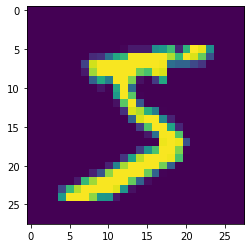

In [6]:
plt.imshow(train_digits[0])

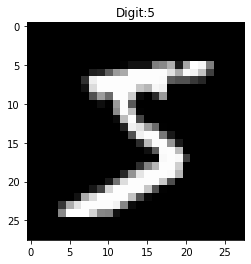

In [7]:
plt.title("Digit:"+str(train_labels[0]))
plt.imshow(train_digits[0],cmap="gray")

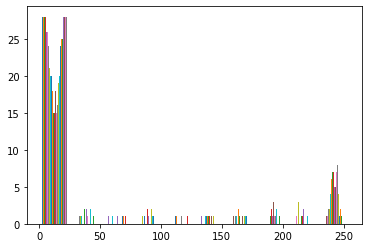

In [8]:
plt.hist(train_digits[0])
plt.show()

In [9]:
samp=np.random.randint(train_digits.shape[0],size=16)
samp

array([33964, 20724, 43003, 35908,  8242, 12056, 42107, 52389, 48049,
       38495, 26850, 27229, 25469, 23107, 23949, 35630])

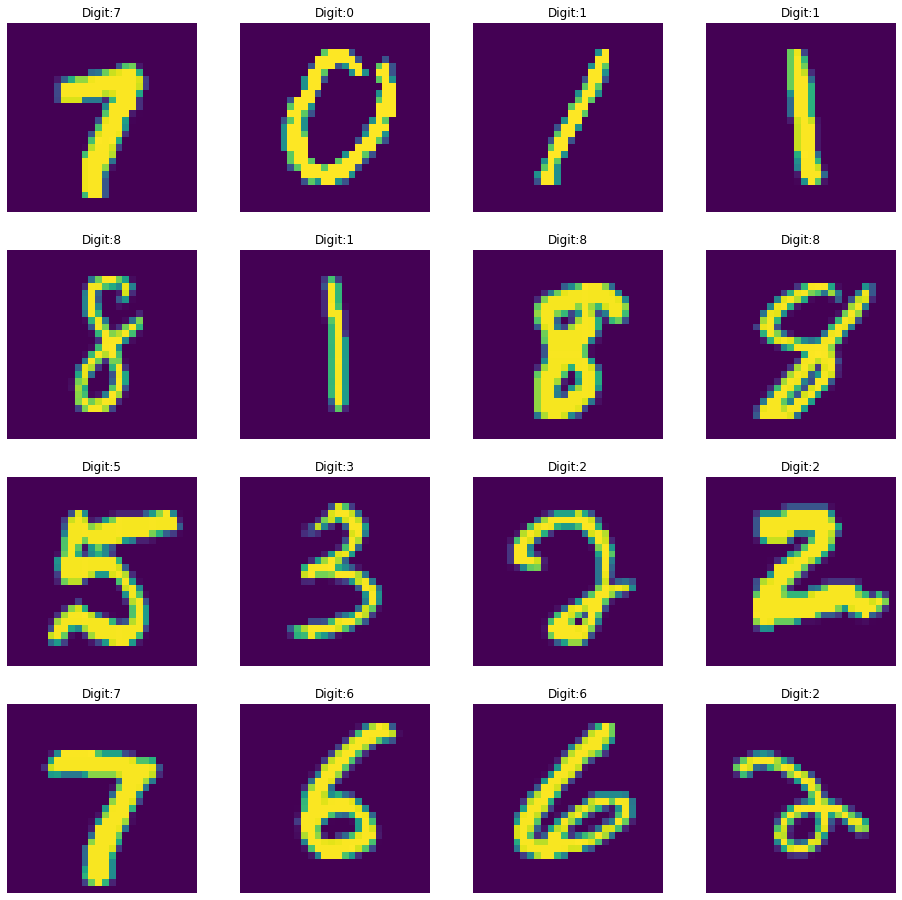

In [10]:
plt.figure(figsize=(16,16))
j=1
for i in samp:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i])
  plt.title("Digit:"+str(train_labels[i]))
  plt.axis("off")
  j=j+1

In [11]:
train_digits_sc=train_digits/255.0
test_digits_sc=test_digits/255.0

In [12]:
from keras.utils import to_categorical

In [13]:
train_labels_cat=to_categorical(train_labels)

In [14]:
test_labels_cat=to_categorical(test_labels)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(train_digits_sc,train_labels_cat,test_size=0.1,random_state=32)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(54000, 28, 28)
(6000, 28, 28)
(54000, 10)
(6000, 10)


In [16]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

model = Sequential()
# first layer we need to mention the input shape

model.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model.add(Dense(128,activation='relu'))# 784 * 128+128
model.add(Dense(128,activation='relu'))# 
model.add(Dense(64,activation='relu'))
model.add(Dense(256,activation='relu'))
#Final layer
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
________________________________________________

In [17]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [18]:
history=model.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 6s 111us/step - loss: 0.2466 - accuracy: 0.9270 - val_loss: 0.1359 - val_accuracy: 0.9602
Epoch 2/5
54000/54000 [==============================] - 6s 104us/step - loss: 0.1091 - accuracy: 0.9664 - val_loss: 0.1139 - val_accuracy: 0.9670
Epoch 3/5
54000/54000 [==============================] - 6s 105us/step - loss: 0.0818 - accuracy: 0.9754 - val_loss: 0.0879 - val_accuracy: 0.9762
Epoch 4/5
54000/54000 [==============================] - 6s 103us/step - loss: 0.0674 - accuracy: 0.9801 - val_loss: 0.1020 - val_accuracy: 0.9720
Epoch 5/5
54000/54000 [==============================] - 6s 104us/step - loss: 0.0543 - accuracy: 0.9827 - val_loss: 0.1017 - val_accuracy: 0.9713


In [19]:
model.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 29us/step


[0.10123616563688556, 0.9724000096321106]

In [20]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [21]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[3.76154212e-11, 1.05548956e-07, 5.79486368e-06, 3.51341178e-08,
        2.27156037e-11, 7.32990058e-12, 4.28683883e-14, 9.99994040e-01,
        1.49486964e-10, 1.16385159e-08]], dtype=float32)

In [22]:
model.predict(test_digits_sc[:10])

array([[3.76154212e-11, 1.05549155e-07, 5.79486914e-06, 3.51341818e-08,
        2.27156453e-11, 7.32990058e-12, 4.28683883e-14, 9.99994040e-01,
        1.49487256e-10, 1.16385381e-08],
       [9.76382974e-10, 2.93829942e-07, 9.99999404e-01, 1.18019940e-07,
        2.23959371e-12, 2.78497975e-10, 1.35310332e-10, 1.43522300e-07,
        1.50676888e-10, 5.17878926e-14],
       [2.38599739e-07, 9.99923229e-01, 6.48197101e-06, 1.07951017e-07,
        2.47255912e-06, 1.62058299e-07, 2.87979356e-06, 3.91164212e-05,
        2.52710961e-05, 7.60582708e-08],
       [9.99772727e-01, 6.02430461e-09, 4.02044934e-05, 1.19743527e-06,
        1.68467488e-06, 5.69393633e-05, 7.23014182e-06, 2.98610921e-05,
        3.54736414e-07, 8.98903818e-05],
       [2.33637948e-07, 4.98690262e-08, 1.03097113e-06, 1.18197914e-08,
        9.14747119e-01, 6.99998691e-06, 1.64517814e-07, 2.66090683e-06,
        1.70814951e-06, 8.52400661e-02],
       [1.43027545e-09, 9.99995708e-01, 2.40565612e-07, 1.42049350e-09,
   

In [23]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [24]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[3.76154212e-11, 1.05548956e-07, 5.79486368e-06, 3.51341178e-08,
        2.27156037e-11, 7.32990058e-12, 4.28683883e-14, 9.99994040e-01,
        1.49486964e-10, 1.16385159e-08]], dtype=float32)

In [25]:
history.history

{'accuracy': [0.9270185, 0.9663889, 0.97535187, 0.98007405, 0.9826852],
 'loss': [0.24663899047465787,
  0.10913361402359549,
  0.08184948975287584,
  0.06739607145999454,
  0.054340534914112476],
 'val_accuracy': [0.9601666927337646,
  0.9670000076293945,
  0.9761666655540466,
  0.972000002861023,
  0.9713333249092102],
 'val_loss': [0.13591732425491015,
  0.11387967252358794,
  0.08791806682633857,
  0.10204213542180757,
  0.10166600266859556]}

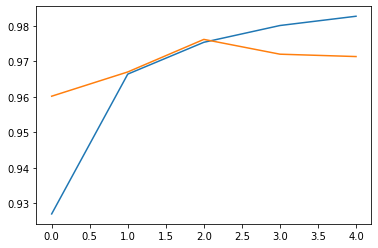

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [27]:
model1 = Sequential()
# first layer we need to mention the input shape

model1.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model1.add(Dense(128,activation='relu'))# 784 * 128+128
model1.add(Dense(256,activation='relu'))# 
model1.add(Dense(64,activation='relu'))
model1.add(Dense(256,activation='relu'))
#Final layer
model1.add(Dense(10,activation='sigmoid'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 169,162
Trainable params: 169,162
Non-trainable params: 0
________________________________________________

In [28]:
model1.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [29]:
history=model1.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 6s 117us/step - loss: 0.2633 - accuracy: 0.9198 - val_loss: 0.1529 - val_accuracy: 0.9563
Epoch 2/5
54000/54000 [==============================] - 6s 114us/step - loss: 0.1105 - accuracy: 0.9675 - val_loss: 0.1194 - val_accuracy: 0.9677
Epoch 3/5
54000/54000 [==============================] - 6s 120us/step - loss: 0.0817 - accuracy: 0.9752 - val_loss: 0.1120 - val_accuracy: 0.9692
Epoch 4/5
54000/54000 [==============================] - 6s 117us/step - loss: 0.0626 - accuracy: 0.9810 - val_loss: 0.1019 - val_accuracy: 0.9742
Epoch 5/5
54000/54000 [==============================] - 6s 115us/step - loss: 0.0538 - accuracy: 0.9839 - val_loss: 0.0903 - val_accuracy: 0.9768


In [30]:
model1.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 30us/step


[0.08221090408244636, 0.9775999784469604]

In [31]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [32]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[3.76154212e-11, 1.05548956e-07, 5.79486368e-06, 3.51341178e-08,
        2.27156037e-11, 7.32990058e-12, 4.28683883e-14, 9.99994040e-01,
        1.49486964e-10, 1.16385159e-08]], dtype=float32)

In [33]:
model.predict(test_digits_sc[:10])


array([[3.76154212e-11, 1.05549155e-07, 5.79486914e-06, 3.51341818e-08,
        2.27156453e-11, 7.32990058e-12, 4.28683883e-14, 9.99994040e-01,
        1.49487256e-10, 1.16385381e-08],
       [9.76382974e-10, 2.93829942e-07, 9.99999404e-01, 1.18019940e-07,
        2.23959371e-12, 2.78497975e-10, 1.35310332e-10, 1.43522300e-07,
        1.50676888e-10, 5.17878926e-14],
       [2.38599739e-07, 9.99923229e-01, 6.48197101e-06, 1.07951017e-07,
        2.47255912e-06, 1.62058299e-07, 2.87979356e-06, 3.91164212e-05,
        2.52710961e-05, 7.60582708e-08],
       [9.99772727e-01, 6.02430461e-09, 4.02044934e-05, 1.19743527e-06,
        1.68467488e-06, 5.69393633e-05, 7.23014182e-06, 2.98610921e-05,
        3.54736414e-07, 8.98903818e-05],
       [2.33637948e-07, 4.98690262e-08, 1.03097113e-06, 1.18197914e-08,
        9.14747119e-01, 6.99998691e-06, 1.64517814e-07, 2.66090683e-06,
        1.70814951e-06, 8.52400661e-02],
       [1.43027545e-09, 9.99995708e-01, 2.40565612e-07, 1.42049350e-09,
   

In [34]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [35]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[3.76154212e-11, 1.05548956e-07, 5.79486368e-06, 3.51341178e-08,
        2.27156037e-11, 7.32990058e-12, 4.28683883e-14, 9.99994040e-01,
        1.49486964e-10, 1.16385159e-08]], dtype=float32)

In [36]:
history.history

{'accuracy': [0.91983336, 0.9675185, 0.97518516, 0.981, 0.9839444],
 'loss': [0.263279491311974,
  0.11047874170307208,
  0.08171538550072108,
  0.0625821150612362,
  0.0537701440099713],
 'val_accuracy': [0.956333339214325,
  0.9676666855812073,
  0.9691666960716248,
  0.9741666913032532,
  0.9768333435058594],
 'val_loss': [0.15290596607824167,
  0.11941888653238615,
  0.11201634951680899,
  0.10186511615167061,
  0.09026123433792964]}

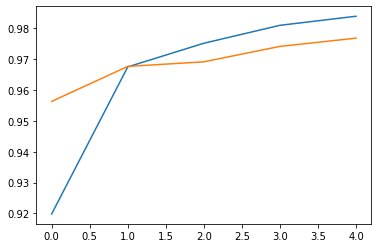

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])